# Derivative Data Analytics Model for Sentiment Analysis using Put Call Ratio in Stock Price Prediction

**The Python code is solely written by Mr. Vijay Kumar Vishwakarma (Enrolment No. 2001376007), a Ph.D. Research Scholar, Department of Computer Science, Indira Gandhi National Tribal University (A Central University), Amarkantak - 484887, District-Anuppur, Madhya Pradesh. <br> I took the help from various websites such as <br><br> 1. For coding assistance <br> a. https://www.kaggle.com/ <br> b. https://github.com/ <br> c. https://medium.com/ <br> d. https://www.analyticsvidhya.com/ <br> e. https://stackoverflow.com/ <br><br> 2. For data accessing <br> a. https://web.quantsapp.com/ (for PCR data)<br> b. https://www.kaggle.com/ (for Twitter data)<br><br> Contact: ressch.vijay.vishwakarma@igntu.ac.in OR vijaykrvishwakarma@gmail.com, Department of Computer Science, IGNTU - Amarkantak, M.P.<br> My Educational Blog: <a href="https://aptipedia.blogspot.com/">Aptipedia Tecknowlegies</a> - https://aptipedia.blogspot.com/**

# Importing required packages

In [1]:
import time
import requests
import pandas as pd
import math
import numpy as np
import nltk
import nltk.tokenize
import matplotlib.pyplot as plt
import scipy
import mplfinance as mpf
import torch
import re
import random
import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import make_pipeline
from transformers import pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, IsolationForest
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
from pyfin_sentiment.model import SentimentModel
from afinn import Afinn
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import sentiwordnet as swn
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

font = {'family' : 'Times New Roman', 'weight' : 'bold', 'size' : 12}
plt.rc('font', family='Times New Roman')
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

In [2]:
start_time = time.time() # Time calulation

In [3]:
np.random.seed(42) #Seeding dataset
random.seed(42)

In [4]:
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading sentiwordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

**Twitter dataset cleaning methods**

In [5]:
def non_ascii(s):
    return "".join(i for i in s if ord(i)<128)

def clean_links(text):
    txt = re.compile('http(s)?://\w+(\.\w+){1,}(/\w+)*')
    return txt.sub(r'', text)

def clean_html(text):
    html = re.compile('<.*?>')
    return html.sub(r'', text)

def punct(text):
    token = nltk.tokenize.RegexpTokenizer(r'\w+')
    text = token.tokenize(text)
    text = " ".join(text)
    return text

#def remove_numbers(text):
#    cleaned_comment = re.sub(r'\d+', '', text)
#    return cleaned_comment

def clean(text):
    text = non_ascii(text)
    #text = remove_numbers(text)
    text = clean_links(text)
    text = clean_html(text)
    text = punct(text)
    return text

**Loading Nifty50 index Twitter dataset**

In [6]:
data1 = pd.read_csv('F:/PHD/IGNTU admission docs/Data and codes/Data for triangulation/NIFTY50TWITTER_2018_2023_Kaggle.csv')
pd.set_option('display.max_colwidth', None)
data1.head()

,Datetime,Id,UserName,Tweet,Likes,Retweets,Replies,Quotes
0,2023-01-15 23:07:06+00:00,1.610000e+18,EternalNomad,Simply the worst service you can ever imagine from a financial institution / bank anywhere in the world @HDFC_Bank @HDFCBank_Cares\n\n#HDFCBank,0.0,0.0,1.0,2.0
1,2023-01-15 22:30:32+00:00,1.610000e+18,RISHUKUMAR_ROY,#INFY Infosys hourly chart analysis.\nRange as of now 1490-1530\nOn either side #Breakout we will trade\n#Nifty #NIFTYIT #StockMarketindia #trading \n@ArrushAdityadev @Trading0secrets @nakulvibhor @Abhishekkar_ https://t.co/8MrbZpglUp,6.0,1.0,0.0,0.0
2,2023-01-15 22:07:03+00:00,1.610000e+18,El_is_Jah,Anish Giri is my favorite to win #tatasteel,0.0,0.0,0.0,0.0
3,2023-01-15 21:24:22+00:00,1.610000e+18,LevonFisch,"Giri 1-0 Gukesh\n\n What can I say: bravo, Anish!\n\n#levonfisch_chess #levonfisch #TataSteel #tournament #chess #FIDE #News #World_Champions https://t.co/CKMMDadXNd",0.0,0.0,0.0,0.0
4,2023-01-15 21:17:09+00:00,1.610000e+18,LevonFisch,Gukesh 0-1 Ding Liren\n\n First scoring game of the tournament.\n\n#levonfisch_chess #levonfisch #TataSteel #tournament #chess #FIDE #news #World_Champions https://t.co/N3LTGTjLdC,0.0,0.0,0.0,0.0


In [7]:
data1['Datetime'] = pd.to_datetime(data1['Datetime']) #separating data and time
data1['Date'] = data1['Datetime'].dt.date
data1['Time'] = data1['Datetime'].dt.time
data1 = data1.drop_duplicates(subset=['Date'])
data1.head()

,Datetime,Id,UserName,Tweet,Likes,Retweets,Replies,Quotes,Date,Time
0,2023-01-15 23:07:06+00:00,1.610000e+18,EternalNomad,Simply the worst service you can ever imagine from a financial institution / bank anywhere in the world @HDFC_Bank @HDFCBank_Cares\n\n#HDFCBank,0.0,0.0,1.0,2.0,2023-01-15,23:07:06
174,2023-01-14 22:53:58+00:00,1.610000e+18,AbhipraGroup,"#OptionChain - #TATASTEEL\n#Stock #Bearish\n#PCR :0.79\nMax #CA buildup at 122,windup at 120 #PE buildup at 120 windup at 107\nHigh #OI CA at 120,125,130 PE at 110,100,115\nOpen account at https://t.co/giz54B9qdU and start #investing in #StockMarket https://t.co/qrBm9O9kkc",0.0,0.0,0.0,0.0,2023-01-14,22:53:58
525,2023-01-13 23:21:02+00:00,1.610000e+18,dellyranksindia,"Evidence of 'Coercion' by Deepak Kochhar, CBI tells Bombay High Court #Bombayhighcourt #CBI #chandakochhar #eepakkochhar #ICICI #ICICIBank #mohite #prithvi #Videocon #VideoconIndustries #VNDhoot https://t.co/ggnUsKMMRE\nhttps://t.co/Wz8vjRVTNF",0.0,0.0,0.0,0.0,2023-01-13,23:21:02
1127,2023-01-12 23:56:52+00:00,1.610000e+18,dellyranksindia,"HCLTech logs 19% rise in Q3 net profit, beats Street estimates #HCLTechnologies #hcltech #HCLtechq3results #HCLTechresults #itservicesprovider #softwareservicesfirm #TataConsultancyServices #TCS https://t.co/sRKPOeCxEr\nhttps://t.co/wrJiyuFpsc",0.0,0.0,0.0,0.0,2023-01-12,23:56:52
1681,2023-01-11 23:52:24+00:00,1.610000e+18,AbhipraGroup,"#ICICIBank $ICICIBANK Daily #Stock Chart with 100 days #Fibonacci Retracement Levels\nFibonacci #Support Levels 865.99, 863.33, 837.5\nFibonacci #Resistance Levels 883.61, 883.61, 897.85\nOpen account at https://t.co/giz54B9qdU and start #investing in #StockMarket https://t.co/YaDTpkucT6",0.0,0.0,0.0,0.0,2023-01-11,23:52:24


In [8]:
data1 = data1.drop(columns=['Datetime'])
# Reorder columns: put 'date' first
cols = ['Date'] + [col for col in data1.columns if col != 'Date']
data1 = data1[cols]
data1.head()

,Date,Id,UserName,Tweet,Likes,Retweets,Replies,Quotes,Time
0,2023-01-15,1.610000e+18,EternalNomad,Simply the worst service you can ever imagine from a financial institution / bank anywhere in the world @HDFC_Bank @HDFCBank_Cares\n\n#HDFCBank,0.0,0.0,1.0,2.0,23:07:06
174,2023-01-14,1.610000e+18,AbhipraGroup,"#OptionChain - #TATASTEEL\n#Stock #Bearish\n#PCR :0.79\nMax #CA buildup at 122,windup at 120 #PE buildup at 120 windup at 107\nHigh #OI CA at 120,125,130 PE at 110,100,115\nOpen account at https://t.co/giz54B9qdU and start #investing in #StockMarket https://t.co/qrBm9O9kkc",0.0,0.0,0.0,0.0,22:53:58
525,2023-01-13,1.610000e+18,dellyranksindia,"Evidence of 'Coercion' by Deepak Kochhar, CBI tells Bombay High Court #Bombayhighcourt #CBI #chandakochhar #eepakkochhar #ICICI #ICICIBank #mohite #prithvi #Videocon #VideoconIndustries #VNDhoot https://t.co/ggnUsKMMRE\nhttps://t.co/Wz8vjRVTNF",0.0,0.0,0.0,0.0,23:21:02
1127,2023-01-12,1.610000e+18,dellyranksindia,"HCLTech logs 19% rise in Q3 net profit, beats Street estimates #HCLTechnologies #hcltech #HCLtechq3results #HCLTechresults #itservicesprovider #softwareservicesfirm #TataConsultancyServices #TCS https://t.co/sRKPOeCxEr\nhttps://t.co/wrJiyuFpsc",0.0,0.0,0.0,0.0,23:56:52
1681,2023-01-11,1.610000e+18,AbhipraGroup,"#ICICIBank $ICICIBANK Daily #Stock Chart with 100 days #Fibonacci Retracement Levels\nFibonacci #Support Levels 865.99, 863.33, 837.5\nFibonacci #Resistance Levels 883.61, 883.61, 897.85\nOpen account at https://t.co/giz54B9qdU and start #investing in #StockMarket https://t.co/YaDTpkucT6",0.0,0.0,0.0,0.0,23:52:24


In [9]:
#removing columns which are not required
data1 = data1.drop(columns=['Time', 'Id', 'UserName', 'Likes', 'Retweets', 'Replies', 'Quotes'])
data1.head()

,Date,Tweet
0,2023-01-15,Simply the worst service you can ever imagine from a financial institution / bank anywhere in the world @HDFC_Bank @HDFCBank_Cares\n\n#HDFCBank
174,2023-01-14,"#OptionChain - #TATASTEEL\n#Stock #Bearish\n#PCR :0.79\nMax #CA buildup at 122,windup at 120 #PE buildup at 120 windup at 107\nHigh #OI CA at 120,125,130 PE at 110,100,115\nOpen account at https://t.co/giz54B9qdU and start #investing in #StockMarket https://t.co/qrBm9O9kkc"
525,2023-01-13,"Evidence of 'Coercion' by Deepak Kochhar, CBI tells Bombay High Court #Bombayhighcourt #CBI #chandakochhar #eepakkochhar #ICICI #ICICIBank #mohite #prithvi #Videocon #VideoconIndustries #VNDhoot https://t.co/ggnUsKMMRE\nhttps://t.co/Wz8vjRVTNF"
1127,2023-01-12,"HCLTech logs 19% rise in Q3 net profit, beats Street estimates #HCLTechnologies #hcltech #HCLtechq3results #HCLTechresults #itservicesprovider #softwareservicesfirm #TataConsultancyServices #TCS https://t.co/sRKPOeCxEr\nhttps://t.co/wrJiyuFpsc"
1681,2023-01-11,"#ICICIBank $ICICIBANK Daily #Stock Chart with 100 days #Fibonacci Retracement Levels\nFibonacci #Support Levels 865.99, 863.33, 837.5\nFibonacci #Resistance Levels 883.61, 883.61, 897.85\nOpen account at https://t.co/giz54B9qdU and start #investing in #StockMarket https://t.co/YaDTpkucT6"


In [10]:
#saving dataset into csv format for further use
data1.to_csv('F:/PHD/IGNTU admission docs/Data and codes/Data for triangulation/TweetNifty50.csv', index = False)

**Loading cleaned Twitter dataset and Nifty50 volume based put call ratio data**

In [11]:
data2 = pd.read_csv('F:/PHD/IGNTU admission docs/Data and codes/Data for triangulation/TweetNifty50.csv',
                    header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
data3 = pd.read_csv('F:/PHD/IGNTU admission docs/Data and codes/Data for triangulation/NIFTY50VOLPCR_2018_2023_QuantsApp.csv',
                    header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
x_data = data2.join(data3, how='inner')
#pd.set_option('display.max_rows', 500)
x_data.head()

,Tweet,PCR,Futures
Date,,,
2023-01-13,"Evidence of 'Coercion' by Deepak Kochhar, CBI tells Bombay High Court #Bombayhighcourt #CBI #chandakochhar #eepakkochhar #ICICI #ICICIBank #mohite #prithvi #Videocon #VideoconIndustries #VNDhoot https://t.co/ggnUsKMMRE\nhttps://t.co/Wz8vjRVTNF",0.888,18025.25
2023-01-12,"HCLTech logs 19% rise in Q3 net profit, beats Street estimates #HCLTechnologies #hcltech #HCLtechq3results #HCLTechresults #itservicesprovider #softwareservicesfirm #TataConsultancyServices #TCS https://t.co/sRKPOeCxEr\nhttps://t.co/wrJiyuFpsc",0.882,17918.65
2023-01-11,"#ICICIBank $ICICIBANK Daily #Stock Chart with 100 days #Fibonacci Retracement Levels\nFibonacci #Support Levels 865.99, 863.33, 837.5\nFibonacci #Resistance Levels 883.61, 883.61, 897.85\nOpen account at https://t.co/giz54B9qdU and start #investing in #StockMarket https://t.co/YaDTpkucT6",0.910,17962.95
2023-01-10,🔔 #ICICIBank down?\n\n🔗 Real-time status: https://t.co/B7gnlsSF62\n\n🔁 RETWEET if you are affected too.\n\n#ICICIBankDown #ICICIBankOutage\n(Possible problems since 2023-01-10 18:38:05),1.042,17986.25
2023-01-09,"@ICICIBank @ICICIBank_Care Trying to check pre approved offers in app, and applied for same, but not going beyond aadhar OTP. It says aadhar OTP verification failed. Why? I'm entering the correct otp received on SMS. PFA. #ICICIBank https://t.co/fDjhj951mf",0.960,18173.20


In [12]:
x_data['Tweet'] = x_data['Tweet'].apply(clean) #cleaning dataset
x_data.dropna().head()

,Tweet,PCR,Futures
Date,,,
2023-01-13,Evidence of Coercion by Deepak Kochhar CBI tells Bombay High Court Bombayhighcourt CBI chandakochhar eepakkochhar ICICI ICICIBank mohite prithvi Videocon VideoconIndustries VNDhoot,0.888,18025.25
2023-01-12,HCLTech logs 19 rise in Q3 net profit beats Street estimates HCLTechnologies hcltech HCLtechq3results HCLTechresults itservicesprovider softwareservicesfirm TataConsultancyServices TCS,0.882,17918.65
2023-01-11,ICICIBank ICICIBANK Daily Stock Chart with 100 days Fibonacci Retracement Levels Fibonacci Support Levels 865 99 863 33 837 5 Fibonacci Resistance Levels 883 61 883 61 897 85 Open account at and start investing in StockMarket,0.910,17962.95
2023-01-10,ICICIBank down Real time status RETWEET if you are affected too ICICIBankDown ICICIBankOutage Possible problems since 2023 01 10 18 38 05,1.042,17986.25
2023-01-09,ICICIBank ICICIBank_Care Trying to check pre approved offers in app and applied for same but not going beyond aadhar OTP It says aadhar OTP verification failed Why I m entering the correct otp received on SMS PFA ICICIBank,0.960,18173.20


In [13]:
random_rows = x_data.sample(n=10) #10 random samples of the joined and cleaned dataset
random_rows

,Tweet,PCR,Futures
Date,,,
2020-04-27,INFY Infosys Chart Pattern TradingView,0.937,9295.15
2018-10-22,HCLTECH Short TradingView,0.897,10231.95
2019-05-30,INFY INFOSYS ST decline to 722 level in coming sessions TradingView,0.939,11944.90
2022-01-21,On Monday only RIL and icicibank can decide markets direction alliswell,0.921,17617.80
2021-09-21,TATASTEEL took support from very imp level the first target would be 1350 65 trade with strict SL short covering may continue Please focus on risk management Let s see what are the outcome from tomorrow s meeting Not a trading advice NSE NIFTYMETAL,0.991,17559.30
2021-03-05,HDFC_Bank Do u all think it s ethical to charge moratorium interest on pre closed loans 2 months after I preclosed my loans I get a statement with a moratorium interest RBI Why do I pay moratorium interest after I receive a loan closure email from HDFC_Bank hdfcbank RBI,0.998,14953.05
2022-01-06,SBIN QTY 2 Risk Per 1000 Rs Another Gift CMP 491 Target Potential Rs 3000 i e 10x Timeline Undefined but FII s are ON Quarter of Quarter Since last few quarters increasing their stakes amp All timeframes are now with us,0.915,17788.65
2022-09-19,Rent paid through ICICI credit card to attract 1 fee CRED houserent ICICIBank ICICIcreditcard Magicbricks MyGate paytm PersonalFinance RedGiraffe,0.853,17628.00
2022-11-15,OptionChain TATASTEEL Stock Bearish PCR 0 64 Max CA buildup at 120 windup at 116 PE buildup at 100 windup at 108 High OI CA at 110 120 100 PE at 100 105 90 Open account at and start investing in StockMarket,1.003,18462.05


In [14]:
x_data.shape

(1249, 3)

# 1. SentiWordNet sentiment analysis

In [15]:
swn_start_time = time.time() #time calculation for SentiWordNet

In [16]:
swn_data = x_data

In [17]:
def get_sentiment_sentiwordnet(text): #function to analyse sentiment
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    pos_score = 0
    neg_score = 0
    for token in tokens:
        synsets = list(swn.senti_synsets(token))
        if synsets:
            synset = synsets[0]
            pos_score += synset.pos_score()
            neg_score += synset.neg_score()
    if pos_score > neg_score:
        return 'positive'
    elif neg_score > pos_score:
        return 'negative'
    else:
        return 'neutral'

In [18]:
swn_data['swn_sa'] = swn_data['Tweet'].apply(get_sentiment_sentiwordnet)
swn_data.head()

,Tweet,PCR,Futures,swn_sa
Date,,,,
2023-01-13,Evidence of Coercion by Deepak Kochhar CBI tells Bombay High Court Bombayhighcourt CBI chandakochhar eepakkochhar ICICI ICICIBank mohite prithvi Videocon VideoconIndustries VNDhoot,0.888,18025.25,positive
2023-01-12,HCLTech logs 19 rise in Q3 net profit beats Street estimates HCLTechnologies hcltech HCLtechq3results HCLTechresults itservicesprovider softwareservicesfirm TataConsultancyServices TCS,0.882,17918.65,negative
2023-01-11,ICICIBank ICICIBANK Daily Stock Chart with 100 days Fibonacci Retracement Levels Fibonacci Support Levels 865 99 863 33 837 5 Fibonacci Resistance Levels 883 61 883 61 897 85 Open account at and start investing in StockMarket,0.910,17962.95,negative
2023-01-10,ICICIBank down Real time status RETWEET if you are affected too ICICIBankDown ICICIBankOutage Possible problems since 2023 01 10 18 38 05,1.042,17986.25,negative
2023-01-09,ICICIBank ICICIBank_Care Trying to check pre approved offers in app and applied for same but not going beyond aadhar OTP It says aadhar OTP verification failed Why I m entering the correct otp received on SMS PFA ICICIBank,0.960,18173.20,positive


**Sentiment classification**

In [19]:
temp_swn = swn_data.groupby('swn_sa').count()['Tweet'].reset_index().sort_values(by='swn_sa', ascending=True)
temp_swn

,swn_sa,Tweet
0,negative,300
1,neutral,410
2,positive,539


**Feature selection**

In [20]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_swn = vectorizer.fit_transform(swn_data['Tweet'])
le_swn = LabelEncoder()
y_swn = le_swn.fit_transform(swn_data['swn_sa'])

**Dataset splitting**

In [21]:
X_train_swn, X_test_swn, y_train_swn, y_test_swn = train_test_split(X_swn, y_swn, test_size=0.2, random_state=42)

**Model training**

In [22]:
model_svm_swn = SVC(kernel='rbf')
model_svm_swn.fit(X_train_swn, y_train_swn)

model_rfc_swn = RandomForestClassifier()
model_rfc_swn.fit(X_train_swn, y_train_swn)

model_knn_swn = KNeighborsClassifier(36)
model_knn_swn.fit(X_train_swn, y_train_swn)

model_log_swn =LogisticRegression()
model_log_swn.fit(X_train_swn, y_train_swn)

model_mnb_swn =MultinomialNB()
model_mnb_swn.fit(X_train_swn, y_train_swn)

model_lgb_swn =LGBMClassifier()
model_lgb_swn.fit(X_train_swn, y_train_swn)

model_ada_swn =AdaBoostClassifier()
model_ada_swn.fit(X_train_swn, y_train_swn)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1474
[LightGBM] [Info] Number of data points in the train set: 999, number of used features: 84
[LightGBM] [Info] Start training from score -1.389302
[LightGBM] [Info] Start training from score -1.119857
[LightGBM] [Info] Start training from score -0.857021


AdaBoostClassifier()

**Model testing and prediction**

In [23]:
y_pred_svm_swn = model_svm_swn.predict(X_test_swn)
y_pred_rfc_swn = model_rfc_swn.predict(X_test_swn)
y_pred_knn_swn = model_knn_swn.predict(X_test_swn)
y_pred_log_swn = model_log_swn.predict(X_test_swn)
y_pred_mnb_swn = model_mnb_swn.predict(X_test_swn)
y_pred_ada_swn = model_ada_swn.predict(X_test_swn)
y_pred_lgb_swn = model_lgb_swn.predict(X_test_swn)

**Performance metrics**

In [24]:
Accuracy_svm_swn= metrics.accuracy_score(y_test_swn, y_pred_svm_swn)
print("Accuracy of SentiWordNet_(SVM):        ", Accuracy_svm_swn)
F1_score_svm_swn = metrics.f1_score(y_test_swn, y_pred_svm_swn, average='weighted')
print("F1_score of SentiWordNet_(SVM):        ", F1_score_svm_swn)

Accuracy of SentiWordNet_(SVM):         0.692
F1_score of SentiWordNet_(SVM):         0.6700317647598635


In [25]:
Accuracy_rfc_swn= metrics.accuracy_score(y_test_swn, y_pred_rfc_swn)
print("Accuracy of SentiWordNet_(RFC):        ", Accuracy_rfc_swn)
F1_score_rfc_swn = metrics.f1_score(y_test_swn, y_pred_rfc_swn, average='weighted')
print("F1_score of SentiWordNet_(RFC):        ", F1_score_rfc_swn)

Accuracy of SentiWordNet_(RFC):         0.72
F1_score of SentiWordNet_(RFC):         0.707285755504146


In [26]:
Accuracy_knn_swn= metrics.accuracy_score(y_test_swn, y_pred_knn_swn)
print("Accuracy of SentiWordNet_(KNN):        ", Accuracy_knn_swn)
F1_score_knn_swn = metrics.f1_score(y_test_swn, y_pred_knn_swn, average='weighted')
print("F1_score of SentiWordNet_(KNN):        ", F1_score_knn_swn)

Accuracy of SentiWordNet_(KNN):         0.588
F1_score of SentiWordNet_(KNN):         0.5746716187506686


In [27]:
Accuracy_log_swn= metrics.accuracy_score(y_test_swn, y_pred_log_swn)
print("Accuracy of SentiWordNet_(LOG):        ", Accuracy_log_swn)
F1_score_log_swn = metrics.f1_score(y_test_swn, y_pred_log_swn, average='weighted')
print("F1_score of SentiWordNet_(LOG):        ", F1_score_log_swn)

Accuracy of SentiWordNet_(LOG):         0.688
F1_score of SentiWordNet_(LOG):         0.6693756664351618


In [28]:
Accuracy_mnb_swn= metrics.accuracy_score(y_test_swn, y_pred_mnb_swn)
print("Accuracy of SentiWordNet_(MNB):        ", Accuracy_mnb_swn)
F1_score_mnb_swn = metrics.f1_score(y_test_swn, y_pred_mnb_swn, average='weighted')
print("F1_score of SentiWordNet_(MNB):        ", F1_score_mnb_swn)

Accuracy of SentiWordNet_(MNB):         0.672
F1_score of SentiWordNet_(MNB):         0.6517569315262645


In [29]:
Accuracy_ada_swn= metrics.accuracy_score(y_test_swn, y_pred_ada_swn)
print("Accuracy of SentiWordNet_(ADA):        ", Accuracy_ada_swn)
F1_score_ada_swn = metrics.f1_score(y_test_swn, y_pred_ada_swn, average='weighted')
print("F1_score of SentiWordNet_(ADA):        ", F1_score_ada_swn)

Accuracy of SentiWordNet_(ADA):         0.604
F1_score of SentiWordNet_(ADA):         0.5679882650029708


In [30]:
Accuracy_lgb_swn= metrics.accuracy_score(y_test_swn, y_pred_lgb_swn)
print("Accuracy of SentiWordNet_(LGB):        ", Accuracy_lgb_swn)
F1_score_lgb_swn = metrics.f1_score(y_test_swn, y_pred_lgb_swn, average='weighted')
print("F1_score of SentiWordNet_(LGB):        ", F1_score_lgb_swn)

Accuracy of SentiWordNet_(LGB):         0.66
F1_score of SentiWordNet_(LGB):         0.6596617376023316


In [31]:
swn_end_time = time.time()  # Record the end time
print(f"Total running time: {swn_end_time - swn_start_time:.2f} seconds")

Total running time: 19.14 seconds


# 2. VADER sentiment analysis

In [32]:
vader_start_time = time.time() #time calulation for VADER

In [33]:
vader_data = x_data
vader = SentimentIntensityAnalyzer()

In [34]:
def get_sentiment_vader(text): #function to evaluate sentiment
    sentiment_score = vader.polarity_scores(text)['compound']
    if sentiment_score > 0.05:
        return 'positive'
    elif sentiment_score < -0.05:
        return 'negative'
    else:
        return 'neutral'

In [35]:
vader_data['vader_sa'] = vader_data['Tweet'].apply(get_sentiment_vader)
vader_data.head()

,Tweet,PCR,Futures,swn_sa,vader_sa
Date,,,,,
2023-01-13,Evidence of Coercion by Deepak Kochhar CBI tells Bombay High Court Bombayhighcourt CBI chandakochhar eepakkochhar ICICI ICICIBank mohite prithvi Videocon VideoconIndustries VNDhoot,0.888,18025.25,positive,neutral
2023-01-12,HCLTech logs 19 rise in Q3 net profit beats Street estimates HCLTechnologies hcltech HCLtechq3results HCLTechresults itservicesprovider softwareservicesfirm TataConsultancyServices TCS,0.882,17918.65,negative,positive
2023-01-11,ICICIBank ICICIBANK Daily Stock Chart with 100 days Fibonacci Retracement Levels Fibonacci Support Levels 865 99 863 33 837 5 Fibonacci Resistance Levels 883 61 883 61 897 85 Open account at and start investing in StockMarket,0.910,17962.95,negative,positive
2023-01-10,ICICIBank down Real time status RETWEET if you are affected too ICICIBankDown ICICIBankOutage Possible problems since 2023 01 10 18 38 05,1.042,17986.25,negative,negative
2023-01-09,ICICIBank ICICIBank_Care Trying to check pre approved offers in app and applied for same but not going beyond aadhar OTP It says aadhar OTP verification failed Why I m entering the correct otp received on SMS PFA ICICIBank,0.960,18173.20,positive,negative


**Sentiment classification**

In [36]:
temp_vader = vader_data.groupby('vader_sa').count()['Tweet'].reset_index().sort_values(by='vader_sa', ascending=True)
temp_vader

,vader_sa,Tweet
0,negative,224
1,neutral,567
2,positive,458


**Feature selection**

In [37]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vader = vectorizer.fit_transform(vader_data['Tweet'])
le_vader = LabelEncoder()
y_vader = le_vader.fit_transform(vader_data['vader_sa'])

**Dataset splitting**

In [38]:
X_train_vader, X_test_vader, y_train_vader, y_test_vader = train_test_split(X_vader, y_vader, test_size=0.2, random_state = 42)

**Model training**

In [39]:
model_svm_vader = SVC(kernel='rbf')
model_svm_vader.fit(X_train_vader, y_train_vader)

model_rfc_vader = RandomForestClassifier()
model_rfc_vader.fit(X_train_vader, y_train_vader)

model_knn_vader = KNeighborsClassifier(36)
model_knn_vader.fit(X_train_vader, y_train_vader)

model_log_vader =LogisticRegression()
model_log_vader.fit(X_train_vader, y_train_vader)

model_mnb_vader =MultinomialNB()
model_mnb_vader.fit(X_train_vader, y_train_vader)

model_lgb_vader =LGBMClassifier()
model_lgb_vader.fit(X_train_vader, y_train_vader)

model_ada_vader =AdaBoostClassifier()
model_ada_vader.fit(X_train_vader, y_train_vader)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1474
[LightGBM] [Info] Number of data points in the train set: 999, number of used features: 84
[LightGBM] [Info] Start training from score -1.747699
[LightGBM] [Info] Start training from score -0.764717
[LightGBM] [Info] Start training from score -1.020651


AdaBoostClassifier()

**Model testing and prediction**

In [40]:
y_pred_svm_vader = model_svm_vader.predict(X_test_vader)
y_pred_rfc_vader = model_rfc_vader.predict(X_test_vader)
y_pred_knn_vader = model_knn_vader.predict(X_test_vader)
y_pred_log_vader = model_log_vader.predict(X_test_vader)
y_pred_mnb_vader = model_mnb_vader.predict(X_test_vader)
y_pred_ada_vader = model_ada_vader.predict(X_test_vader)
y_pred_lgb_vader = model_lgb_vader.predict(X_test_vader)

**Performance metrics**

In [41]:
Accuracy_svm_vader= metrics.accuracy_score(y_test_vader, y_pred_svm_vader)
print("Accuracy of Vader_(SVM):        ", Accuracy_svm_vader)
F1_score_svm_vader = metrics.f1_score(y_test_vader, y_pred_svm_vader, average='weighted')
print("F1_score of Vader_(SVM):        ", F1_score_svm_vader)

Accuracy of Vader_(SVM):         0.636
F1_score of Vader_(SVM):         0.5972933237616656


In [42]:
Accuracy_rfc_vader= metrics.accuracy_score(y_test_vader, y_pred_rfc_vader)
print("Accuracy of VADER_(RFC):        ", Accuracy_rfc_vader)
F1_score_rfc_vader = metrics.f1_score(y_test_vader, y_pred_rfc_vader, average='weighted')
print("F1_score of VADER_(RFC):        ", F1_score_rfc_vader)

Accuracy of VADER_(RFC):         0.66
F1_score of VADER_(RFC):         0.6388993054974479


In [43]:
Accuracy_knn_vader= metrics.accuracy_score(y_test_vader, y_pred_knn_vader)
print("Accuracy of VADER_(KNN):        ", Accuracy_knn_vader)
F1_score_knn_vader = metrics.f1_score(y_test_vader, y_pred_knn_vader, average='weighted')
print("F1_score of VADER_(KNN):        ", F1_score_knn_vader)

Accuracy of VADER_(KNN):         0.504
F1_score of VADER_(KNN):         0.43069108476597645


In [44]:
Accuracy_log_vader= metrics.accuracy_score(y_test_vader, y_pred_log_vader)
print("Accuracy of VADER_(LOG):        ", Accuracy_log_vader)
F1_score_log_vader = metrics.f1_score(y_test_vader, y_pred_log_vader, average='weighted')
print("F1_score of VADER_(LOG):        ", F1_score_log_vader)

Accuracy of VADER_(LOG):         0.648
F1_score of VADER_(LOG):         0.6141814549395453


In [45]:
Accuracy_mnb_vader= metrics.accuracy_score(y_test_vader, y_pred_mnb_vader)
print("Accuracy of VADER_(MNB):        ", Accuracy_mnb_vader)
F1_score_mnb_vader = metrics.f1_score(y_test_vader, y_pred_mnb_vader, average='weighted')
print("F1_score of VADER_(MNB):        ", F1_score_mnb_vader)

Accuracy of VADER_(MNB):         0.564
F1_score of VADER_(MNB):         0.49828393241479824


In [46]:
Accuracy_ada_vader= metrics.accuracy_score(y_test_vader, y_pred_ada_vader)
print("Accuracy of VADER_(ADA):        ", Accuracy_ada_vader)
F1_score_ada_vader = metrics.f1_score(y_test_vader, y_pred_ada_vader, average='weighted')
print("F1_score of VADER_(ADA):        ", F1_score_ada_vader)

Accuracy of VADER_(ADA):         0.6
F1_score of VADER_(ADA):         0.559217806969531


In [47]:
Accuracy_lgb_vader= metrics.accuracy_score(y_test_vader, y_pred_lgb_vader)
print("Accuracy of VADER_(LGB):        ", Accuracy_lgb_vader)
F1_score_lgb_vader = metrics.f1_score(y_test_vader, y_pred_lgb_vader, average='weighted')
print("F1_score of VADER_(LGB):        ", F1_score_lgb_vader)

Accuracy of VADER_(LGB):         0.632
F1_score of VADER_(LGB):         0.618001906880661


In [48]:
vader_end_time = time.time()  # Record the end time
print(f"Total running time: {vader_end_time - vader_start_time:.2f} seconds")

Total running time: 6.07 seconds


# 3. TextBlob sentiment analysis

In [49]:
blob_start_time = time.time() 

In [50]:
blob_data = x_data

In [51]:
def get_sentiment_blob(text): #function to calculate sentiment
# Create a TextBlob object
    blob = TextBlob(text)
# Polarity ranges from -1 (negative) to 1 (positive), so classify accordingly
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [52]:
blob_data['blob_sa'] = blob_data['Tweet'].apply(get_sentiment_blob)
blob_data.head()

,Tweet,PCR,Futures,swn_sa,vader_sa,blob_sa
Date,,,,,,
2023-01-13,Evidence of Coercion by Deepak Kochhar CBI tells Bombay High Court Bombayhighcourt CBI chandakochhar eepakkochhar ICICI ICICIBank mohite prithvi Videocon VideoconIndustries VNDhoot,0.888,18025.25,positive,neutral,positive
2023-01-12,HCLTech logs 19 rise in Q3 net profit beats Street estimates HCLTechnologies hcltech HCLtechq3results HCLTechresults itservicesprovider softwareservicesfirm TataConsultancyServices TCS,0.882,17918.65,negative,positive,neutral
2023-01-11,ICICIBank ICICIBANK Daily Stock Chart with 100 days Fibonacci Retracement Levels Fibonacci Support Levels 865 99 863 33 837 5 Fibonacci Resistance Levels 883 61 883 61 897 85 Open account at and start investing in StockMarket,0.910,17962.95,negative,positive,neutral
2023-01-10,ICICIBank down Real time status RETWEET if you are affected too ICICIBankDown ICICIBankOutage Possible problems since 2023 01 10 18 38 05,1.042,17986.25,negative,negative,positive
2023-01-09,ICICIBank ICICIBank_Care Trying to check pre approved offers in app and applied for same but not going beyond aadhar OTP It says aadhar OTP verification failed Why I m entering the correct otp received on SMS PFA ICICIBank,0.960,18173.20,positive,negative,negative


**Sentiment classification**

In [53]:
temp_blob = blob_data.groupby('blob_sa').count()['Tweet'].reset_index().sort_values(by='blob_sa', ascending=True)
temp_blob

,blob_sa,Tweet
0,negative,255
1,neutral,576
2,positive,418


**Feature selection**

In [54]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_blob = vectorizer.fit_transform(blob_data['Tweet'])
le_blob = LabelEncoder()
y_blob = le_blob.fit_transform(blob_data['blob_sa'])

**Dataset splitting**

In [55]:
X_train_blob, X_test_blob, y_train_blob, y_test_blob = train_test_split(X_blob, y_blob, test_size=0.2, random_state=42)

In [56]:
y_train_blob.shape, y_test_blob.shape

((999,), (250,))

**Model training**

In [57]:
model_svm_blob = SVC(kernel='rbf')
model_svm_blob.fit(X_train_blob, y_train_blob)

model_rfc_blob = RandomForestClassifier()
model_rfc_blob.fit(X_train_blob, y_train_blob)

model_knn_blob = KNeighborsClassifier(36)
model_knn_blob.fit(X_train_blob, y_train_blob)

model_log_blob =LogisticRegression()
model_log_blob.fit(X_train_blob, y_train_blob)

model_mnb_blob =MultinomialNB()
model_mnb_blob.fit(X_train_blob, y_train_blob)

model_lgb_blob =LGBMClassifier()
model_lgb_blob.fit(X_train_blob, y_train_blob)

model_ada_blob =AdaBoostClassifier()
model_ada_blob.fit(X_train_blob, y_train_blob)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1474
[LightGBM] [Info] Number of data points in the train set: 999, number of used features: 84
[LightGBM] [Info] Start training from score -1.574036
[LightGBM] [Info] Start training from score -0.771190
[LightGBM] [Info] Start training from score -1.107662


AdaBoostClassifier()

**Model testing and prediciton**

In [58]:
y_pred_svm_blob = model_svm_blob.predict(X_test_blob)
y_pred_rfc_blob = model_rfc_blob.predict(X_test_blob)
y_pred_knn_blob = model_knn_blob.predict(X_test_blob)
y_pred_log_blob = model_log_blob.predict(X_test_blob)
y_pred_mnb_blob = model_mnb_blob.predict(X_test_blob)
y_pred_ada_blob = model_ada_blob.predict(X_test_blob)
y_pred_lgb_blob = model_lgb_blob.predict(X_test_blob)

**Performance metrics**

In [59]:
Accuracy_svm_blob= metrics.accuracy_score(y_test_blob, y_pred_svm_blob)
print("Accuracy of Textblob_(SVM):        ", Accuracy_svm_blob)
F1_score_svm_blob = metrics.f1_score(y_test_blob, y_pred_svm_blob, average='weighted')
print("F1_score of Textblob_(SVM):        ", F1_score_svm_blob)

Accuracy of Textblob_(SVM):         0.628
F1_score of Textblob_(SVM):         0.6000900662251656


In [60]:
Accuracy_rfc_blob= metrics.accuracy_score(y_test_blob, y_pred_rfc_blob)
print("Accuracy of TextBlob_(RFC):        ", Accuracy_rfc_blob)
F1_score_rfc_blob = metrics.f1_score(y_test_blob, y_pred_rfc_blob, average='weighted')
print("F1_score of TextBlob_(RFC):        ", F1_score_rfc_blob)

Accuracy of TextBlob_(RFC):         0.66
F1_score of TextBlob_(RFC):         0.6337437210676646


In [61]:
Accuracy_knn_blob= metrics.accuracy_score(y_test_blob, y_pred_knn_blob)
print("Accuracy of TextBlob_(KNN):        ", Accuracy_knn_blob)
F1_score_knn_blob = metrics.f1_score(y_test_blob, y_pred_knn_blob, average='weighted')
print("F1_score of TextBlob_(KNN):        ", F1_score_knn_blob)

Accuracy of TextBlob_(KNN):         0.576
F1_score of TextBlob_(KNN):         0.5237505709976299


In [62]:
Accuracy_log_blob= metrics.accuracy_score(y_test_blob, y_pred_log_blob)
print("Accuracy of TextBlob_(LOG):        ", Accuracy_log_blob)
F1_score_log_blob = metrics.f1_score(y_test_blob, y_pred_log_blob, average='weighted')
print("F1_score of TextBlob_(LOG):        ", F1_score_log_blob)

Accuracy of TextBlob_(LOG):         0.624
F1_score of TextBlob_(LOG):         0.5998655957161982


In [63]:
Accuracy_mnb_blob= metrics.accuracy_score(y_test_blob, y_pred_mnb_blob)
print("Accuracy of TextBlob_(MNB):        ", Accuracy_mnb_blob)
F1_score_mnb_blob = metrics.f1_score(y_test_blob, y_pred_mnb_blob, average='weighted')
print("F1_score of TextBlob_(MNB):        ", F1_score_mnb_blob)

Accuracy of TextBlob_(MNB):         0.6
F1_score of TextBlob_(MNB):         0.5478035046955174


In [64]:
Accuracy_ada_blob= metrics.accuracy_score(y_test_blob, y_pred_ada_blob)
print("Accuracy of TextBlob_(ADA):        ", Accuracy_ada_blob)
F1_score_ada_blob = metrics.f1_score(y_test_blob, y_pred_ada_blob, average='weighted')
print("F1_score of TextBlob_(ADA):        ", F1_score_ada_blob)

Accuracy of TextBlob_(ADA):         0.588
F1_score of TextBlob_(ADA):         0.5250907276507276


In [65]:
Accuracy_lgb_blob= metrics.accuracy_score(y_test_blob, y_pred_lgb_blob)
print("Accuracy of TextBlob_(LGB):        ", Accuracy_lgb_blob)
F1_score_lgb_blob = metrics.f1_score(y_test_blob, y_pred_lgb_blob, average='weighted')
print("F1_score of TextBlob_(LGB):        ", F1_score_lgb_blob)

Accuracy of TextBlob_(LGB):         0.592
F1_score of TextBlob_(LGB):         0.58991016796848


In [66]:
blob_end_time = time.time()  # Record the end time
print(f"Total running time: {blob_end_time - blob_start_time:.2f} seconds")

Total running time: 6.83 seconds


# 4. AFinn sentiment analysis

In [67]:
afinn_start_time = time.time()

In [68]:
afinn_data = x_data
afinn = Afinn()

In [69]:
#determine sentiment
afinn_data['afinn_si'] = afinn_data['Tweet'].astype(str).apply(afinn.score)
afinn_data['afn_sa'] = afinn_data['afinn_si'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')
afinn_data.head()

,Tweet,PCR,Futures,swn_sa,vader_sa,blob_sa,afinn_si,afn_sa
Date,,,,,,,,
2023-01-13,Evidence of Coercion by Deepak Kochhar CBI tells Bombay High Court Bombayhighcourt CBI chandakochhar eepakkochhar ICICI ICICIBank mohite prithvi Videocon VideoconIndustries VNDhoot,0.888,18025.25,positive,neutral,positive,-2.0,negative
2023-01-12,HCLTech logs 19 rise in Q3 net profit beats Street estimates HCLTechnologies hcltech HCLtechq3results HCLTechresults itservicesprovider softwareservicesfirm TataConsultancyServices TCS,0.882,17918.65,negative,positive,neutral,3.0,positive
2023-01-11,ICICIBank ICICIBANK Daily Stock Chart with 100 days Fibonacci Retracement Levels Fibonacci Support Levels 865 99 863 33 837 5 Fibonacci Resistance Levels 883 61 883 61 897 85 Open account at and start investing in StockMarket,0.910,17962.95,negative,positive,neutral,2.0,positive
2023-01-10,ICICIBank down Real time status RETWEET if you are affected too ICICIBankDown ICICIBankOutage Possible problems since 2023 01 10 18 38 05,1.042,17986.25,negative,negative,positive,-3.0,negative
2023-01-09,ICICIBank ICICIBank_Care Trying to check pre approved offers in app and applied for same but not going beyond aadhar OTP It says aadhar OTP verification failed Why I m entering the correct otp received on SMS PFA ICICIBank,0.960,18173.20,positive,negative,negative,0.0,neutral


**Sentiment classification**

In [70]:
temp_afinn = afinn_data.groupby('afn_sa').count()['Tweet'].reset_index().sort_values(by='afn_sa', ascending=True)
temp_afinn

,afn_sa,Tweet
0,negative,226
1,neutral,625
2,positive,398


**Feature selection**

In [71]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_afinn = vectorizer.fit_transform(afinn_data['Tweet'])
le_afinn = LabelEncoder()
y_afinn = le_afinn.fit_transform(afinn_data['afn_sa'])

**Dataset splitting**

In [72]:
X_train_afinn, X_test_afinn, y_train_afinn, y_test_afinn = train_test_split(X_afinn, y_afinn, test_size=0.2, random_state=42)

**Model training**

In [73]:
model_svm_afinn = SVC(kernel='rbf')
model_svm_afinn.fit(X_train_afinn, y_train_afinn)

model_rfc_afinn = RandomForestClassifier()
model_rfc_afinn.fit(X_train_afinn, y_train_afinn)

model_knn_afinn = KNeighborsClassifier(36)
model_knn_afinn.fit(X_train_afinn, y_train_afinn)

model_log_afinn =LogisticRegression()
model_log_afinn.fit(X_train_afinn, y_train_afinn)

model_mnb_afinn =MultinomialNB()
model_mnb_afinn.fit(X_train_afinn, y_train_afinn)

model_lgb_afinn =LGBMClassifier()
model_lgb_afinn.fit(X_train_afinn, y_train_afinn)

model_ada_afinn =AdaBoostClassifier()
model_ada_afinn.fit(X_train_afinn, y_train_afinn)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1474
[LightGBM] [Info] Number of data points in the train set: 999, number of used features: 84
[LightGBM] [Info] Start training from score -1.741969
[LightGBM] [Info] Start training from score -0.668430
[LightGBM] [Info] Start training from score -1.163752


AdaBoostClassifier()

**Model testing and prediction**

In [74]:
y_pred_svm_afinn = model_svm_afinn.predict(X_test_afinn)
y_pred_rfc_afinn = model_rfc_afinn.predict(X_test_afinn)
y_pred_knn_afinn = model_knn_afinn.predict(X_test_afinn)
y_pred_log_afinn = model_log_afinn.predict(X_test_afinn)
y_pred_mnb_afinn = model_mnb_afinn.predict(X_test_afinn)
y_pred_ada_afinn = model_ada_afinn.predict(X_test_afinn)
y_pred_lgb_afinn = model_lgb_afinn.predict(X_test_afinn)

**Performance metrics**

In [75]:
Accuracy_svm_afinn= metrics.accuracy_score(y_test_afinn, y_pred_svm_afinn)
print("Accuracy of AFinn_(SVM):        ", Accuracy_svm_afinn)
F1_score_svm_afinn = metrics.f1_score(y_test_afinn, y_pred_svm_afinn, average='weighted')
print("F1_score of AFinn_(SVM):        ", F1_score_svm_afinn)

Accuracy of AFinn_(SVM):         0.628
F1_score of AFinn_(SVM):         0.5789852110335659


In [76]:
Accuracy_rfc_afinn= metrics.accuracy_score(y_test_afinn, y_pred_rfc_afinn)
print("Accuracy of AFinn_(RFC):        ", Accuracy_rfc_afinn)
F1_score_rfc_afinn = metrics.f1_score(y_test_afinn, y_pred_rfc_afinn, average='weighted')
print("F1_score of AFinn_(RFC):        ", F1_score_rfc_afinn)

Accuracy of AFinn_(RFC):         0.648
F1_score of AFinn_(RFC):         0.6153764542386341


In [77]:
Accuracy_knn_afinn= metrics.accuracy_score(y_test_afinn, y_pred_knn_afinn)
print("Accuracy of AFinn_(KNN):        ", Accuracy_knn_afinn)
F1_score_knn_afinn = metrics.f1_score(y_test_afinn, y_pred_knn_afinn, average='weighted')
print("F1_score of AFinn_(KNN):        ", F1_score_knn_afinn)

Accuracy of AFinn_(KNN):         0.504
F1_score of AFinn_(KNN):         0.4066465201465202


In [78]:
Accuracy_log_afinn= metrics.accuracy_score(y_test_afinn, y_pred_log_afinn)
print("Accuracy of AFinn_(LOG):        ", Accuracy_log_afinn)
F1_score_log_afinn = metrics.f1_score(y_test_afinn, y_pred_log_afinn, average='weighted')
print("F1_score of AFinn_(LOG):        ", F1_score_log_afinn)

Accuracy of AFinn_(LOG):         0.636
F1_score of AFinn_(LOG):         0.5944878285794031


In [79]:
Accuracy_mnb_afinn= metrics.accuracy_score(y_test_afinn, y_pred_mnb_afinn)
print("Accuracy of AFinn_(MNB):        ", Accuracy_mnb_afinn)
F1_score_mnb_afinn = metrics.f1_score(y_test_afinn, y_pred_mnb_afinn, average='weighted')
print("F1_score of AFinn_(MNB):        ", F1_score_mnb_afinn)

Accuracy of AFinn_(MNB):         0.572
F1_score of AFinn_(MNB):         0.5012546564546565


In [80]:
Accuracy_ada_afinn= metrics.accuracy_score(y_test_afinn, y_pred_ada_afinn)
print("Accuracy of AFinn_(ADA):        ", Accuracy_ada_afinn)
F1_score_ada_afinn = metrics.f1_score(y_test_afinn, y_pred_ada_afinn, average='weighted')
print("F1_score of AFinn_(ADA):        ", F1_score_ada_afinn)

Accuracy of AFinn_(ADA):         0.536
F1_score of AFinn_(ADA):         0.4417888123606687


In [81]:
Accuracy_lgb_afinn= metrics.accuracy_score(y_test_afinn, y_pred_lgb_afinn)
print("Accuracy of AFinn_(LGB):        ", Accuracy_lgb_afinn)
F1_score_lgb_afinn = metrics.f1_score(y_test_afinn, y_pred_lgb_afinn, average='weighted')
print("F1_score of AFinn_(LGB):        ", F1_score_lgb_afinn)

Accuracy of AFinn_(LGB):         0.608
F1_score of AFinn_(LGB):         0.5948716505955758


In [82]:
afinn_end_time = time.time()  # Record the end time
print(f"Total running time: {afinn_end_time - afinn_start_time:.2f} seconds")

Total running time: 7.15 seconds


## Fake tweet detection

In [83]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
# Unsupervised fake detection using Isolation Forest
model = make_pipeline(vectorizer, StandardScaler(with_mean=False), IsolationForest(contamination=0.05, random_state=42))
x_data['Anomaly?'] = model.fit_predict(x_data['Tweet'])
x_data['Fake?'] = x_data['Anomaly?'].apply(lambda x: 'YES' if x == -1 else 'NO')
x_data.head()

,Tweet,PCR,Futures,swn_sa,vader_sa,blob_sa,afinn_si,afn_sa,Anomaly?,Fake?
Date,,,,,,,,,,
2023-01-13,Evidence of Coercion by Deepak Kochhar CBI tells Bombay High Court Bombayhighcourt CBI chandakochhar eepakkochhar ICICI ICICIBank mohite prithvi Videocon VideoconIndustries VNDhoot,0.888,18025.25,positive,neutral,positive,-2.0,negative,1,NO
2023-01-12,HCLTech logs 19 rise in Q3 net profit beats Street estimates HCLTechnologies hcltech HCLtechq3results HCLTechresults itservicesprovider softwareservicesfirm TataConsultancyServices TCS,0.882,17918.65,negative,positive,neutral,3.0,positive,-1,YES
2023-01-11,ICICIBank ICICIBANK Daily Stock Chart with 100 days Fibonacci Retracement Levels Fibonacci Support Levels 865 99 863 33 837 5 Fibonacci Resistance Levels 883 61 883 61 897 85 Open account at and start investing in StockMarket,0.910,17962.95,negative,positive,neutral,2.0,positive,-1,YES
2023-01-10,ICICIBank down Real time status RETWEET if you are affected too ICICIBankDown ICICIBankOutage Possible problems since 2023 01 10 18 38 05,1.042,17986.25,negative,negative,positive,-3.0,negative,1,NO
2023-01-09,ICICIBank ICICIBank_Care Trying to check pre approved offers in app and applied for same but not going beyond aadhar OTP It says aadhar OTP verification failed Why I m entering the correct otp received on SMS PFA ICICIBank,0.960,18173.20,positive,negative,negative,0.0,neutral,1,NO


In [84]:
temp_fake = x_data.groupby('Fake?').count()['Tweet'].reset_index().sort_values(by='Fake?', ascending=True)
temp_fake

,Fake?,Tweet
0,NO,1186
1,YES,63


# 5. FinBERT sentiment analysis

In [85]:
bert_start_time = time.time()

**Loading model**

In [86]:
bert_data = x_data
MODEL_NAME = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

In [87]:
def get_sentiment_bert(text): #analyse sentiment
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    scores = softmax(outputs.logits, dim=1).squeeze().tolist()
    labels = ["negative", "neutral", "positive"]
    sentiment = labels[scores.index(max(scores))] # Select highest probability sentiment
    return sentiment

In [88]:
bert_data['bert_sa'] = bert_data['Tweet'].apply(get_sentiment_bert)
bert_data.head()

,Tweet,PCR,Futures,swn_sa,vader_sa,blob_sa,afinn_si,afn_sa,Anomaly?,Fake?,bert_sa
Date,,,,,,,,,,,
2023-01-13,Evidence of Coercion by Deepak Kochhar CBI tells Bombay High Court Bombayhighcourt CBI chandakochhar eepakkochhar ICICI ICICIBank mohite prithvi Videocon VideoconIndustries VNDhoot,0.888,18025.25,positive,neutral,positive,-2.0,negative,1,NO,negative
2023-01-12,HCLTech logs 19 rise in Q3 net profit beats Street estimates HCLTechnologies hcltech HCLtechq3results HCLTechresults itservicesprovider softwareservicesfirm TataConsultancyServices TCS,0.882,17918.65,negative,positive,neutral,3.0,positive,-1,YES,neutral
2023-01-11,ICICIBank ICICIBANK Daily Stock Chart with 100 days Fibonacci Retracement Levels Fibonacci Support Levels 865 99 863 33 837 5 Fibonacci Resistance Levels 883 61 883 61 897 85 Open account at and start investing in StockMarket,0.910,17962.95,negative,positive,neutral,2.0,positive,-1,YES,negative
2023-01-10,ICICIBank down Real time status RETWEET if you are affected too ICICIBankDown ICICIBankOutage Possible problems since 2023 01 10 18 38 05,1.042,17986.25,negative,negative,positive,-3.0,negative,1,NO,positive
2023-01-09,ICICIBank ICICIBank_Care Trying to check pre approved offers in app and applied for same but not going beyond aadhar OTP It says aadhar OTP verification failed Why I m entering the correct otp received on SMS PFA ICICIBank,0.960,18173.20,positive,negative,negative,0.0,neutral,1,NO,negative


**Sentiment classification**

In [89]:
temp_bert = bert_data.groupby('bert_sa').count()['Tweet'].reset_index().sort_values(by='bert_sa', ascending=True)
temp_bert

,bert_sa,Tweet
0,negative,993
1,neutral,166
2,positive,90


**Feature selection**

In [90]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_bert = vectorizer.fit_transform(bert_data['Tweet'])
le_bert = LabelEncoder()
y_bert = le_bert.fit_transform(bert_data['bert_sa'])

**Dataset splitting**

In [91]:
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(X_bert, y_bert, test_size=0.2, random_state=42)

**Model training**

In [92]:
model_svm_bert = SVC(kernel='rbf')
model_svm_bert.fit(X_train_bert, y_train_bert)

model_rfc_bert = RandomForestClassifier()
model_rfc_bert.fit(X_train_bert, y_train_bert)

model_knn_bert = KNeighborsClassifier(36)
model_knn_bert.fit(X_train_bert, y_train_bert)

model_log_bert =LogisticRegression()
model_log_bert.fit(X_train_bert, y_train_bert)

model_mnb_bert =MultinomialNB()
model_mnb_bert.fit(X_train_bert, y_train_bert)

model_lgb_bert =LGBMClassifier()
model_lgb_bert.fit(X_train_bert, y_train_bert)

model_ada_bert =AdaBoostClassifier()
model_ada_bert.fit(X_train_bert, y_train_bert)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1474
[LightGBM] [Info] Number of data points in the train set: 999, number of used features: 84
[LightGBM] [Info] Start training from score -0.220894
[LightGBM] [Info] Start training from score -2.094570
[LightGBM] [Info] Start training from score -2.589267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


AdaBoostClassifier()

**Model testing and prediction**

In [93]:
y_pred_svm_bert = model_svm_bert.predict(X_test_bert)
y_pred_rfc_bert = model_rfc_bert.predict(X_test_bert)
y_pred_knn_bert = model_knn_bert.predict(X_test_bert)
y_pred_log_bert = model_log_bert.predict(X_test_bert)
y_pred_mnb_bert = model_mnb_bert.predict(X_test_bert)
y_pred_ada_bert = model_ada_bert.predict(X_test_bert)
y_pred_lgb_bert = model_lgb_bert.predict(X_test_bert)

**Perfromance metrics**

In [94]:
Accuracy_svm_bert= metrics.accuracy_score(y_test_bert, y_pred_svm_bert)
print("Accuracy of bert_(SVM):        ", Accuracy_svm_bert)
F1_score_svm_bert = metrics.f1_score(y_test_bert, y_pred_svm_bert, average='weighted')
print("F1_score of bert_(SVM):        ", F1_score_svm_bert)

Accuracy of bert_(SVM):         0.82
F1_score of bert_(SVM):         0.7738980392156863


In [95]:
Accuracy_rfc_bert= metrics.accuracy_score(y_test_bert, y_pred_rfc_bert)
print("Accuracy of bert_(RFC):        ", Accuracy_rfc_bert)
F1_score_rfc_bert = metrics.f1_score(y_test_bert, y_pred_rfc_bert, average='weighted')
print("F1_score of bert_(RFC):        ", F1_score_rfc_bert)

Accuracy of bert_(RFC):         0.836
F1_score of bert_(RFC):         0.8051445396708553


In [96]:
Accuracy_knn_bert= metrics.accuracy_score(y_test_bert, y_pred_knn_bert)
print("Accuracy of bert_(KNN):        ", Accuracy_knn_bert)
F1_score_knn_bert = metrics.f1_score(y_test_bert, y_pred_knn_bert, average='weighted')
print("F1_score of bert_(KNN):        ", F1_score_knn_bert)

Accuracy of bert_(KNN):         0.784
F1_score of bert_(KNN):         0.7057883362841353


In [97]:
Accuracy_log_bert= metrics.accuracy_score(y_test_bert, y_pred_log_bert)
print("Accuracy of bert_(LOG):        ", Accuracy_log_bert)
F1_score_log_bert = metrics.f1_score(y_test_bert, y_pred_log_bert, average='weighted')
print("F1_score of bert_(LOG):        ", F1_score_log_bert)

Accuracy of bert_(LOG):         0.82
F1_score of bert_(LOG):         0.7731655668275386


In [98]:
Accuracy_mnb_bert= metrics.accuracy_score(y_test_bert, y_pred_mnb_bert)
print("Accuracy of bert_(MNB):        ", Accuracy_mnb_bert)
F1_score_mnb_bert = metrics.f1_score(y_test_bert, y_pred_mnb_bert, average='weighted')
print("F1_score of bert_(MNB):        ", F1_score_mnb_bert)

Accuracy of bert_(MNB):         0.772
F1_score of bert_(MNB):         0.6765528756957329


In [99]:
Accuracy_ada_bert= metrics.accuracy_score(y_test_bert, y_pred_ada_bert)
print("Accuracy of bert_(ADA):        ", Accuracy_ada_bert)
F1_score_ada_bert = metrics.f1_score(y_test_bert, y_pred_ada_bert, average='weighted')
print("F1_score of bert_(ADA):        ", F1_score_ada_bert)

Accuracy of bert_(ADA):         0.812
F1_score of bert_(ADA):         0.7620463746779538


In [100]:
Accuracy_lgb_bert= metrics.accuracy_score(y_test_bert, y_pred_lgb_bert)
print("Accuracy of bert_(LGB):        ", Accuracy_lgb_bert)
F1_score_lgb_bert = metrics.f1_score(y_test_bert, y_pred_lgb_bert, average='weighted')
print("F1_score of bert_(LGB):        ", F1_score_lgb_bert)

Accuracy of bert_(LGB):         0.812
F1_score of bert_(LGB):         0.7943549614044192


In [101]:
bert_end_time = time.time()  # Record the end time
print(f"Total running time: {bert_end_time - bert_start_time:.2f} seconds")

Total running time: 230.37 seconds


# 6. PCR_SA sentiment analysis

In [102]:
pcr_start_time = time.time()

In [103]:
pcrdata = x_data

In [104]:
pcrdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1249 entries, 2023-01-13 to 2018-01-01
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tweet     1249 non-null   object 
 1   PCR       1249 non-null   float64
 2   Futures   1249 non-null   float64
 3   swn_sa    1249 non-null   object 
 4   vader_sa  1249 non-null   object 
 5   blob_sa   1249 non-null   object 
 6   afinn_si  1249 non-null   float64
 7   afn_sa    1249 non-null   object 
 8   Anomaly?  1249 non-null   int32  
 9   Fake?     1249 non-null   object 
 10  bert_sa   1249 non-null   object 
dtypes: float64(3), int32(1), object(7)
memory usage: 112.2+ KB


In [105]:
pcrdata.describe()

,PCR,Futures,afinn_si,Anomaly?
count,1249.000000,1249.000000,1249.000000,1249.000000
mean,0.944872,13380.479504,0.491593,0.899119
std,0.110269,2933.517108,2.626017,0.437879
min,0.565000,7581.550000,-20.000000,-1.000000
25%,0.874000,10925.150000,0.000000,1.000000
50%,0.938000,11940.750000,0.000000,1.000000
75%,1.005000,16298.850000,2.000000,1.000000
max,1.559000,18948.300000,16.000000,1.000000


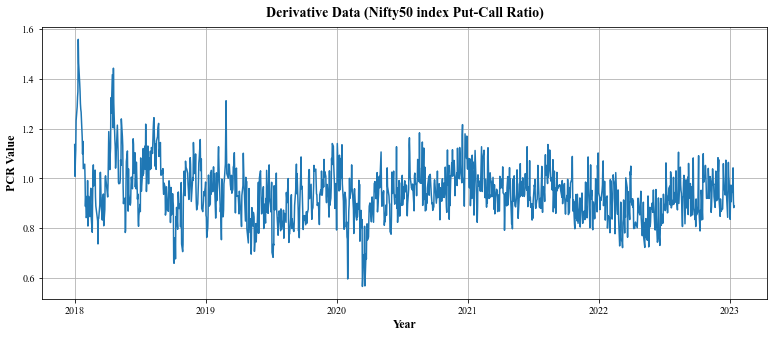

In [133]:
plt.figure(figsize=(13, 5))
plt.title('Derivative Data (Nifty50 index Put-Call Ratio)', weight='bold')
plt.plot(pcrdata['PCR'])
plt.xlabel('Year', weight = 'bold')
plt.ylabel('PCR Value', weight='bold')
plt.grid(True)
#plt.savefig("Historical Put call ratio.tif", dpi = 400)

In [107]:
def get_sentiment_pcr(row): #sentiment analysis using PCR
    pcr = row['PCR']
    if pcr < 0.8 :
        return 'positive'
    elif pcr > 1.1 :
        return 'negative'
    else:
        return 'neutral'

In [108]:
pcrdata['pcr_sa'] = pcrdata.apply(get_sentiment_pcr, axis = 1)
pcrdata.head()

,Tweet,PCR,Futures,swn_sa,vader_sa,blob_sa,afinn_si,afn_sa,Anomaly?,Fake?,bert_sa,pcr_sa
Date,,,,,,,,,,,,
2023-01-13,Evidence of Coercion by Deepak Kochhar CBI tells Bombay High Court Bombayhighcourt CBI chandakochhar eepakkochhar ICICI ICICIBank mohite prithvi Videocon VideoconIndustries VNDhoot,0.888,18025.25,positive,neutral,positive,-2.0,negative,1,NO,negative,neutral
2023-01-12,HCLTech logs 19 rise in Q3 net profit beats Street estimates HCLTechnologies hcltech HCLtechq3results HCLTechresults itservicesprovider softwareservicesfirm TataConsultancyServices TCS,0.882,17918.65,negative,positive,neutral,3.0,positive,-1,YES,neutral,neutral
2023-01-11,ICICIBank ICICIBANK Daily Stock Chart with 100 days Fibonacci Retracement Levels Fibonacci Support Levels 865 99 863 33 837 5 Fibonacci Resistance Levels 883 61 883 61 897 85 Open account at and start investing in StockMarket,0.910,17962.95,negative,positive,neutral,2.0,positive,-1,YES,negative,neutral
2023-01-10,ICICIBank down Real time status RETWEET if you are affected too ICICIBankDown ICICIBankOutage Possible problems since 2023 01 10 18 38 05,1.042,17986.25,negative,negative,positive,-3.0,negative,1,NO,positive,neutral
2023-01-09,ICICIBank ICICIBank_Care Trying to check pre approved offers in app and applied for same but not going beyond aadhar OTP It says aadhar OTP verification failed Why I m entering the correct otp received on SMS PFA ICICIBank,0.960,18173.20,positive,negative,negative,0.0,neutral,1,NO,negative,neutral


In [109]:
pcrdata.shape

(1249, 12)

**Sentiment classification**

In [110]:
temp_pcr = pcrdata.groupby('pcr_sa').count()['Tweet'].reset_index().sort_values(by='pcr_sa', ascending=True)
temp_pcr

,pcr_sa,Tweet
0,negative,90
1,neutral,1065
2,positive,94


**Feature selection**

In [111]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(pcrdata['Tweet'])
le = LabelEncoder()
y = le_bert.fit_transform(pcrdata['pcr_sa'])

**Dataset splitting**

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model training**

In [113]:
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train, y_train)

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

model_knn = KNeighborsClassifier(36)
model_knn.fit(X_train, y_train)

model_log =LogisticRegression()
model_log.fit(X_train, y_train)

model_mnb =MultinomialNB()
model_mnb.fit(X_train, y_train)

model_lgb =LGBMClassifier()
model_lgb.fit(X_train, y_train)

model_ada =AdaBoostClassifier()
model_ada.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1474
[LightGBM] [Info] Number of data points in the train set: 999, number of used features: 84
[LightGBM] [Info] Start training from score -2.550046
[LightGBM] [Info] Start training from score -0.168602
[LightGBM] [Info] Start training from score -2.562949
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


AdaBoostClassifier()

**Model testing and prediction**

In [114]:
y_pred_svm = model_svm.predict(X_test)
y_pred_rfc = model_rfc.predict(X_test)
y_pred_knn = model_knn.predict(X_test)
y_pred_log = model_log.predict(X_test)
y_pred_mnb = model_mnb.predict(X_test)
y_pred_ada = model_ada.predict(X_test)
y_pred_lgb = model_lgb.predict(X_test)

**Performance metrics**

In [115]:
Accuracy_svm_pcr= metrics.accuracy_score(y_test, y_pred_svm)
print("Accuracy of proposed PCR_SA_(SVM):        ", Accuracy_svm_pcr)
F1_score_svm_pcr = metrics.f1_score(y_test, y_pred_svm, average='weighted')
print("F1_score of proposed PCR_SA_(SVM):        ", F1_score_svm_pcr)

Accuracy of proposed PCR_SA_(SVM):         0.888
F1_score of proposed PCR_SA_(SVM):         0.8387207855973814


In [116]:
Accuracy_rfc_pcr= metrics.accuracy_score(y_test, y_pred_rfc)
print("Accuracy of proposed PCR_SA_(RFC):        ", Accuracy_rfc_pcr)
F1_score_rfc_pcr = metrics.f1_score(y_test, y_pred_rfc, average='weighted')
print("F1_score of proposed PCR_SA_(RFC):        ", F1_score_rfc_pcr)

Accuracy of proposed PCR_SA_(RFC):         0.888
F1_score of proposed PCR_SA_(RFC):         0.8456536212325685


In [117]:
Accuracy_knn_pcr= metrics.accuracy_score(y_test, y_pred_knn)
print("Accuracy of proposed PCR_SA_(KNN):        ", Accuracy_knn_pcr)
F1_score_knn_pcr = metrics.f1_score(y_test, y_pred_knn, average='weighted')
print("F1_score of proposed PCR_SA_(KNN):        ", F1_score_knn_pcr)

Accuracy of proposed PCR_SA_(KNN):         0.884
F1_score of proposed PCR_SA_(KNN):         0.8295711252653928


In [118]:
Accuracy_log_pcr= metrics.accuracy_score(y_test, y_pred_log)
print("Accuracy of proposed PCR_SA_(LOG):        ", Accuracy_log_pcr)
F1_score_log_pcr = metrics.f1_score(y_test, y_pred_log, average='weighted')
print("F1_score of proposed PCR_SA_(LOG):        ", F1_score_log_pcr)

Accuracy of proposed PCR_SA_(LOG):         0.884
F1_score of proposed PCR_SA_(LOG):         0.8295711252653928


In [119]:
Accuracy_mnb_pcr= metrics.accuracy_score(y_test, y_pred_mnb)
print("Accuracy of proposed PCR_SA_(MNB):        ", Accuracy_mnb_pcr)
F1_score_mnb_pcr = metrics.f1_score(y_test, y_pred_mnb, average='weighted')
print("F1_score of proposed PCR_SA_(MNB):        ", F1_score_mnb_pcr)

Accuracy of proposed PCR_SA_(MNB):         0.884
F1_score of proposed PCR_SA_(MNB):         0.8295711252653928


In [120]:
Accuracy_ada_pcr= metrics.accuracy_score(y_test, y_pred_ada)
print("Accuracy of proposed PCR_SA_(ADA):        ", Accuracy_ada_pcr)
F1_score_ada_pcr = metrics.f1_score(y_test, y_pred_ada, average='weighted')
print("F1_score of proposed PCR_SA_(ADA):        ", F1_score_ada_pcr)

Accuracy of proposed PCR_SA_(ADA):         0.888
F1_score of proposed PCR_SA_(ADA):         0.8387207855973814


In [121]:
Accuracy_lgb_pcr= metrics.accuracy_score(y_test, y_pred_lgb)
print("Accuracy of proposed PCR_SA_(LGB):        ", Accuracy_lgb_pcr)
F1_score_lgb_pcr = metrics.f1_score(y_test, y_pred_lgb, average='weighted')
print("F1_score of proposed PCR_SA_(LGB):        ", F1_score_lgb_pcr)

Accuracy of proposed PCR_SA_(LGB):         0.84
F1_score of proposed PCR_SA_(LGB):         0.8222676661087257


In [122]:
pcr_end_time = time.time()  # Record the end time
print(f"Total running time: {pcr_end_time - pcr_start_time:.2f} seconds")

Total running time: 25.51 seconds


## Overall Pie chart

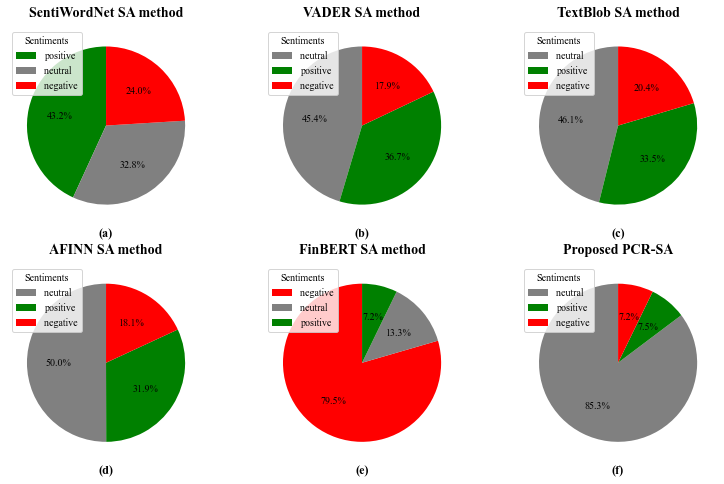

In [134]:
fig, ax = plt.subplots(2, 3, figsize=(13, 8))

ax[0,0].set_title("SentiWordNet SA method", weight='bold')
ax[0,1].set_title("VADER SA method", weight='bold')
ax[0,2].set_title("TextBlob SA method", weight='bold')
ax[1,0].set_title("AFINN SA method", weight='bold')
ax[1,1].set_title("FinBERT SA method", weight='bold')
ax[1,2].set_title("Proposed PCR-SA", weight='bold')

sentiment_counts = swn_data['swn_sa'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ["green", "grey", "red"]
explode = (0, 0, 0)
ax[0,0].pie(sizes, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax[0,0].legend(sentiment_counts.index, title="Sentiments", loc="upper left")
ax[0,0].set_xlabel('(a)')

sentiment_counts = vader_data['vader_sa'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ["grey", "green", "red"]
explode = (0, 0, 0)
ax[0,1].pie(sizes, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax[0,1].legend(sentiment_counts.index, title="Sentiments", loc="upper left")
ax[0,1].set_xlabel('(b)')

sentiment_counts = blob_data['blob_sa'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ["grey", "green", "red"]
explode = (0, 0, 0)
ax[0,2].pie(sizes, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax[0,2].legend(sentiment_counts.index, title="Sentiments", loc="upper left")
ax[0,2].set_xlabel('(c)')

sentiment_counts = afinn_data['afn_sa'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ["grey", "green", "red"]
explode = (0, 0, 0)
ax[1,0].pie(sizes, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax[1,0].legend(sentiment_counts.index, title="Sentiments", loc="upper left")
ax[1,0].set_xlabel('(d)')

sentiment_counts = bert_data['bert_sa'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ["red", "grey", "green"]
explode = (0, 0, 0)
ax[1,1].pie(sizes, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax[1,1].legend(sentiment_counts.index, title="Sentiments", loc="upper left")
ax[1,1].set_xlabel('(e)')

sentiment_counts = pcrdata['pcr_sa'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ["grey", "green", "red"]
explode = (0, 0, 0)
ax[1,2].pie(sizes, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax[1,2].legend(sentiment_counts.index, title="Sentiments", loc="upper left")
ax[1,2].set_xlabel('(f)')
#fig.savefig("Sentiment pie chart_PCR_SA.tif", dpi = 400)

In [124]:
data4 = pd.read_csv('F:/PHD/IGNTU admission docs/Data and codes/Data for triangulation/NIFTY50OHLCAV_2018_2023_Kaggle.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
data4.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-13,17867.50000,17999.34961,17774.25000,17956.59961,17956.59961,256700
2023-01-12,17920.84961,17945.80078,17761.65039,17858.19922,17858.19922,227800
2023-01-11,17924.25000,17976.34961,17824.34961,17895.69922,17895.69922,259900
2023-01-10,18121.30078,18127.59961,17856.00000,17914.15039,17914.15039,283300
2023-01-09,17952.55078,18141.40039,17936.15039,18101.19922,18101.19922,257200


In [125]:
data4['Daily Return'] = data4['Close'].pct_change() * 100 # Compute daily returns
data4.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1.242000e+03,1241.000000
mean,13383.800048,13452.712481,13289.089079,13373.396459,13373.396459,4.220783e+05,-0.036030
std,2930.776620,2938.434159,2919.908735,2931.376285,2931.376285,2.161506e+05,1.245316
min,7735.149902,8036.950195,7511.100098,7610.250000,7610.250000,1.000000e+02,-8.057146
25%,10911.100342,10958.424810,10837.587890,10902.575200,10902.575200,2.581500e+05,-0.697989
50%,11939.099610,11984.050295,11866.774905,11923.774905,11923.774905,3.553000e+05,-0.079055
75%,16301.887695,16404.337890,16208.537358,16300.037110,16300.037110,5.561000e+05,0.510099
max,18871.949220,18887.599610,18778.199220,18812.500000,18812.500000,1.811000e+06,14.916727


In [126]:
threshold = 1.25
positive_days = data4[data4['Daily Return'] > threshold]
print(f"Total positive days (> {threshold}%): {len(positive_days)}")

Total positive days (> 1.25%): 110


## Overall confusion matrix

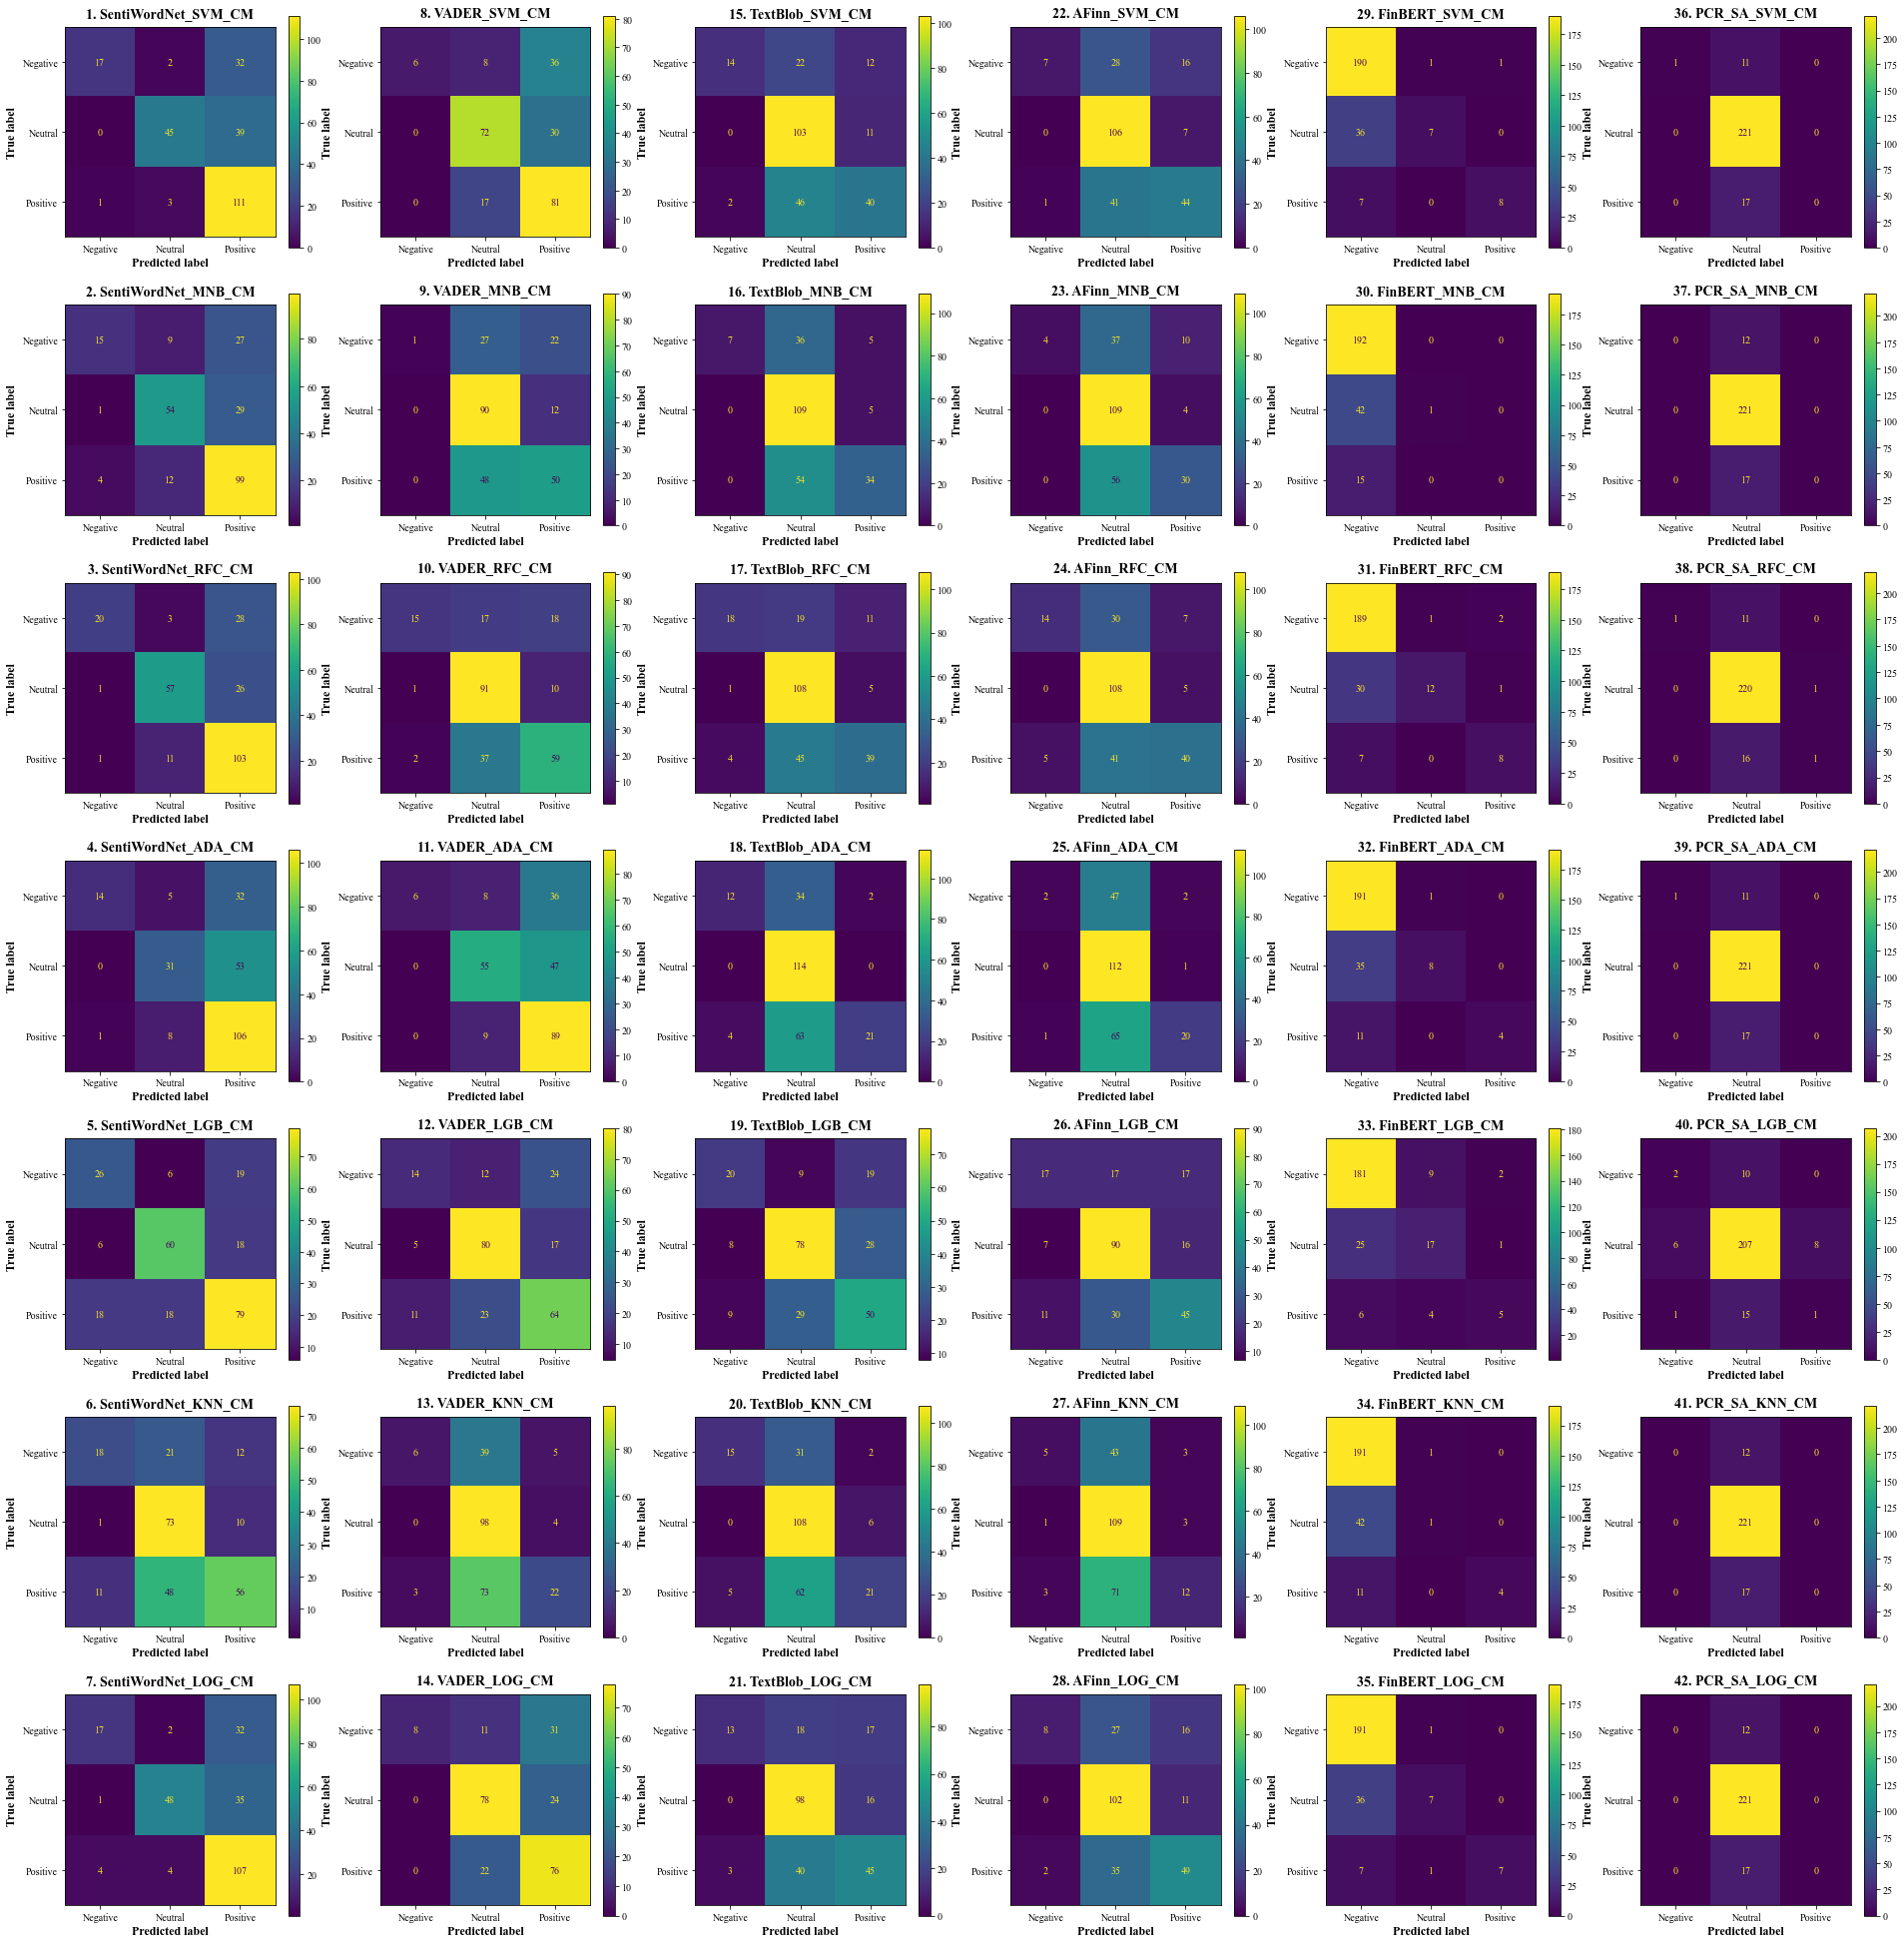

In [131]:
fig, ax = plt.subplots(nrows=7, ncols=6, figsize=(33, 35))

ax[0,0].set_title("1. SentiWordNet_SVM_CM", weight = 'bold')
ax[1,0].set_title("2. SentiWordNet_MNB_CM", weight = 'bold')
ax[2,0].set_title("3. SentiWordNet_RFC_CM", weight = 'bold')
ax[3,0].set_title("4. SentiWordNet_ADA_CM", weight = 'bold')
ax[4,0].set_title("5. SentiWordNet_LGB_CM", weight = 'bold')
ax[5,0].set_title("6. SentiWordNet_KNN_CM", weight = 'bold')
ax[6,0].set_title("7. SentiWordNet_LOG_CM", weight = 'bold')

ax[0,1].set_title("8. VADER_SVM_CM", weight = 'bold')
ax[1,1].set_title("9. VADER_MNB_CM", weight = 'bold')
ax[2,1].set_title("10. VADER_RFC_CM", weight = 'bold')
ax[3,1].set_title("11. VADER_ADA_CM", weight = 'bold')
ax[4,1].set_title("12. VADER_LGB_CM", weight = 'bold')
ax[5,1].set_title("13. VADER_KNN_CM", weight = 'bold')
ax[6,1].set_title("14. VADER_LOG_CM", weight = 'bold')

ax[0,2].set_title("15. TextBlob_SVM_CM", weight = 'bold')
ax[1,2].set_title("16. TextBlob_MNB_CM", weight = 'bold')
ax[2,2].set_title("17. TextBlob_RFC_CM", weight = 'bold')
ax[3,2].set_title("18. TextBlob_ADA_CM", weight = 'bold')
ax[4,2].set_title("19. TextBlob_LGB_CM", weight = 'bold')
ax[5,2].set_title("20. TextBlob_KNN_CM", weight = 'bold')
ax[6,2].set_title("21. TextBlob_LOG_CM", weight = 'bold')

ax[0,3].set_title("22. AFinn_SVM_CM", weight = 'bold')
ax[1,3].set_title("23. AFinn_MNB_CM", weight = 'bold')
ax[2,3].set_title("24. AFinn_RFC_CM", weight = 'bold')
ax[3,3].set_title("25. AFinn_ADA_CM", weight = 'bold')
ax[4,3].set_title("26. AFinn_LGB_CM", weight = 'bold')
ax[5,3].set_title("27. AFinn_KNN_CM", weight = 'bold')
ax[6,3].set_title("28. AFinn_LOG_CM", weight = 'bold')

ax[0,4].set_title("29. FinBERT_SVM_CM", weight = 'bold')
ax[1,4].set_title("30. FinBERT_MNB_CM", weight = 'bold')
ax[2,4].set_title("31. FinBERT_RFC_CM", weight = 'bold')
ax[3,4].set_title("32. FinBERT_ADA_CM", weight = 'bold')
ax[4,4].set_title("33. FinBERT_LGB_CM", weight = 'bold')
ax[5,4].set_title("34. FinBERT_KNN_CM", weight = 'bold')
ax[6,4].set_title("35. FinBERT_LOG_CM", weight = 'bold')

ax[0,5].set_title("36. PCR_SA_SVM_CM", weight = 'bold')
ax[1,5].set_title("37. PCR_SA_MNB_CM", weight = 'bold')
ax[2,5].set_title("38. PCR_SA_RFC_CM", weight = 'bold')
ax[3,5].set_title("39. PCR_SA_ADA_CM", weight = 'bold')
ax[4,5].set_title("40. PCR_SA_LGB_CM", weight = 'bold')
ax[5,5].set_title("41. PCR_SA_KNN_CM", weight = 'bold')
ax[6,5].set_title("42. PCR_SA_LOG_CM", weight = 'bold')


metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_swn, y_pred_svm_swn), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[0,0])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_swn, y_pred_mnb_swn), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[1,0])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_swn, y_pred_rfc_swn), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[2,0])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_swn, y_pred_ada_swn), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[3,0])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_swn, y_pred_lgb_swn), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[4,0])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_swn, y_pred_knn_swn), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[5,0])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_swn, y_pred_log_swn), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[6,0])


metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_vader, y_pred_svm_vader), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[0,1])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_vader, y_pred_mnb_vader), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[1,1])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_vader, y_pred_rfc_vader), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[2,1])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_vader, y_pred_ada_vader), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[3,1])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_vader, y_pred_lgb_vader), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[4,1])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_vader, y_pred_knn_vader), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[5,1])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_vader, y_pred_log_vader), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[6,1])


metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_blob, y_pred_svm_blob), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[0,2])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_blob, y_pred_mnb_blob), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[1,2])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_blob, y_pred_rfc_blob), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[2,2])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_blob, y_pred_ada_blob), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[3,2])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_blob, y_pred_lgb_blob), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[4,2])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_blob, y_pred_knn_blob), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[5,2])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_blob, y_pred_log_blob), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[6,2])


metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_afinn, y_pred_svm_afinn), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[0,3])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_afinn, y_pred_mnb_afinn), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[1,3])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_afinn, y_pred_rfc_afinn), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[2,3])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_afinn, y_pred_ada_afinn), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[3,3])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_afinn, y_pred_lgb_afinn), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[4,3])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_afinn, y_pred_knn_afinn), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[5,3])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_afinn, y_pred_log_afinn), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[6,3])


metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_bert, y_pred_svm_bert), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[0,4])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_bert, y_pred_mnb_bert), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[1,4])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_bert, y_pred_rfc_bert), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[2,4])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_bert, y_pred_ada_bert), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[3,4])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_bert, y_pred_lgb_bert), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[4,4])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_bert, y_pred_knn_bert), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[5,4])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test_bert, y_pred_log_bert), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[6,4])


metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test, y_pred_svm), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[0,5])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test, y_pred_mnb), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[1,5])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test, y_pred_rfc), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[2,5])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test, y_pred_ada), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[3,5])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test, y_pred_lgb), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[4,5])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test, y_pred_knn), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[5,5])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_test, y_pred_log), 
    display_labels=['Negative', 'Neutral', 'Positive']).plot(ax=ax[6,5])
#plt.savefig("Confusion Matrices_PCR_SA.tif", dpi = 300)

In [128]:
end_time = time.time()  # Record the end time
print(f"Total running time: {end_time - start_time:.2f} seconds")

Total running time: 332.16 seconds
